In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
data = pd.read_csv("hmelq.csv")
df = data.copy()

In [4]:
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,3576.0,0.199385,0.399594,0.00,0.00,0.000,0.00,1.000
loan,3576.0,18529.697987,11262.834060,1100.00,11000.00,16200.000,23100.00,89900.000
mortdue,3262.0,74013.907992,44016.833772,2619.00,46700.25,65858.000,91717.00,399550.000
value,3512.0,101076.922759,54865.275351,8800.00,65753.00,89183.000,118928.25,850000.000
yoj,3264.0,8.832644,7.568046,0.00,3.00,7.000,13.00,41.000
derog,3149.0,0.261670,0.865178,0.00,0.00,0.000,0.00,10.000
delinq,3225.0,0.432558,1.099230,0.00,0.00,0.000,0.00,15.000
clage,3397.0,179.832529,87.066198,0.49,115.60,173.640,230.71,1168.230
ninq,3273.0,1.186373,1.728723,0.00,0.00,1.000,2.00,17.000
clno,3443.0,21.507116,10.167490,0.00,15.00,20.000,26.00,71.000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      3576 non-null   int64  
 1   loan     3576 non-null   int64  
 2   mortdue  3262 non-null   float64
 3   value    3512 non-null   float64
 4   reason   3429 non-null   object 
 5   job      3409 non-null   object 
 6   yoj      3264 non-null   float64
 7   derog    3149 non-null   float64
 8   delinq   3225 non-null   float64
 9   clage    3397 non-null   float64
 10  ninq     3273 non-null   float64
 11  clno     3443 non-null   float64
 12  debtinc  2809 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [7]:
df.shape

(3576, 13)

In [8]:
df.isnull().sum()

bad          0
loan         0
mortdue    314
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64

In [9]:
df = df.dropna()

In [10]:
#kategorik değişkenler için dummy uyguluyorum
dms = pd.get_dummies(df[['job', 'reason']])
dms.head()

,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self,reason_DebtCon,reason_HomeImp
153,1,0,0,0,0,0,1,0
154,1,0,0,0,0,0,1,0
155,1,0,0,0,0,0,1,0
156,1,0,0,0,0,0,0,1
157,1,0,0,0,0,0,1,0


In [11]:
df =  df.drop(["job","reason"], axis = 1)
df.head()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [12]:
df = pd.concat([df, dms], axis = 1)
df

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self,reason_DebtCon,reason_HomeImp
153,0,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,0,0,0,0,1,0
154,0,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,0,0,0,0,1,0
155,0,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,0,0,0,0,1,0
156,0,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,1,0,0,0,0,0,0,1
157,0,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,1,7200,15637.0,39660.0,6.0,0.0,1.0,354.24,3.0,42.0,33.624,0,0,0,0,0,1,0,1
3546,1,53400,228236.0,305514.0,6.0,0.0,0.0,11.15,0.0,2.0,34.558,0,0,0,0,0,1,0,1
3547,1,27300,106221.0,137727.0,3.0,0.0,0.0,300.57,3.0,45.0,32.560,0,0,0,0,0,1,1,0
3548,1,37300,68789.0,86172.0,2.0,0.0,6.0,235.64,2.0,25.0,114.051,0,0,0,0,0,1,0,1


In [13]:
df["bad"].value_counts()
# bad'in dagılımına baktık

0    1840
1     178
Name: bad, dtype: int64

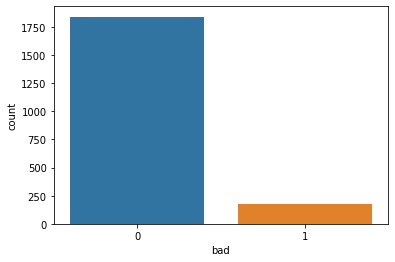

In [14]:
sns.countplot(df['bad'])


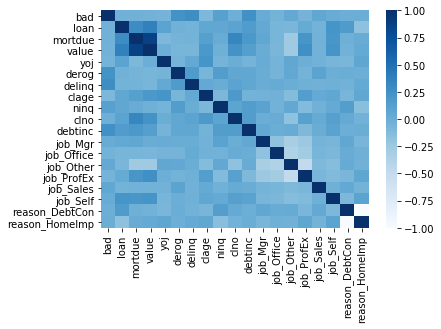

In [15]:
sns.heatmap(df.corr(), cmap='Blues')

# Statsmodel

In [16]:
y = df["bad"]
X = df.drop(["bad"], axis=1)

In [17]:
loj = sm.Logit(y, X)
loj_model = loj.fit()
loj_model.summary()


Optimization terminated successfully.
         Current function value: 0.228362
         Iterations 8


C:\Users\Seyma Civan\anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\Seyma Civan\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2001
Method:                           MLE   Df Model:                           16
Date:                Wed, 05 Aug 2020   Pseudo R-squ.:                  0.2346
Time:                        21:33:22   Log-Likelihood:                -460.84
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 1.039e-50
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -1.73e-05   1.05e-05     -1.640      0.101    -3.8e-05    3.37e-06
mortdue        -4.777e-06   4.76e-06     -1.004      0.315   -1.41e-05    4.55e-06
value           4.089e-06   4.06e-06      1.006      0.314   -3.87e-06    1.21e-05
yoj               -0.0109      0.013     -0.854      0.393      -0.036       0.014
derog              0.5708      0.130      4.382      0.000       0.315       0.826
delinq             0.7985      0.095      8.448      0.000       0.613       0.984
clage             -0.0046      0.001     -3.354      0.001      -0.007      -0.002
ninq               0.1119      0.049      2.303      0.021       0.017       0.207
clno              -0.0286      0.011     -2.627      0.009      -0.050      -0.007
debtinc            0.1143      0.014      8.222      0.000       0.087       0.142
job_Mgr           -1.4722        nan        nan        nan         nan         nan
job_Office        -2.0716        nan        nan        nan         nan         nan
job_Other         -1.5260        nan        nan        nan         nan         nan
job_ProfEx        -1.5377        nan        nan        nan         nan         nan
job_Sales         -0.2487        nan        nan        nan         nan         nan
job_Self          -0.7970        nan        nan        nan         nan         nan
reason_DebtCon    -3.7938        nan        nan        nan         nan         nan
reason_HomeImp    -3.8593        nan        nan        nan         nan         nan
==================================================================================
"""

In [ ]:
#mortdue value yoj atılabilir

# Scikit Learn

In [18]:
from sklearn.linear_model import LogisticRegression

loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
loj_model.intercept_

array([-0.00324269])

In [20]:
loj_model.coef_

array([[-3.61184983e-05, -7.60407860e-06, -1.60665147e-06,
        -2.18248876e-02,  8.21303436e-03,  1.47225578e-02,
        -8.64368101e-03,  5.13458077e-03, -2.10653048e-02,
         3.18733475e-02, -2.22049899e-05, -1.65783579e-03,
        -1.78692245e-03, -8.04545103e-04,  4.63692034e-04,
         5.65123256e-04, -2.15505059e-03, -1.08764245e-03]])

## Tahmin & Model Tuning

In [21]:
y_pred = loj_model.predict(X)

In [22]:
confusion_matrix(y, y_pred)
#gerçekte 1 iken / 0 iken diye düşün

array([[1834,    6],
       [ 174,    4]], dtype=int64)

In [23]:
accuracy_score(y, y_pred)
#doğru sınıflandırma oranı %91

0.910802775024777

In [24]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1840
           1       0.40      0.02      0.04       178

    accuracy                           0.91      2018
   macro avg       0.66      0.51      0.50      2018
weighted avg       0.87      0.91      0.87      2018



In [36]:
loj_model.predict(X)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [49]:
loj_model.predict_proba(X)[0:10][:,0:2]
#tahminimizdeki 0-1 olma olasılıkları

array([[0.94153123, 0.05846877],
       [0.81381915, 0.18618085],
       [0.9890837 , 0.0109163 ],
       [0.83412234, 0.16587766],
       [0.82562034, 0.17437966],
       [0.98377529, 0.01622471],
       [0.85502532, 0.14497468],
       [0.96690632, 0.03309368],
       [0.7470426 , 0.2529574 ],
       [0.96094519, 0.03905481]])

In [50]:
y[0:10]

153    0
154    0
155    0
156    0
157    0
158    0
159    0
160    0
161    0
162    0
Name: bad, dtype: int64

In [51]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

#y tamin değerler y_probs içinde tutuluyor

In [52]:
y_probs[0:10]

array([0.05846877, 0.18618085, 0.0109163 , 0.16587766, 0.17437966,
       0.01622471, 0.14497468, 0.03309368, 0.2529574 , 0.03905481])

In [86]:
y_pred = [1 if i > 0.2 else 0 for i in y_probs]

In [87]:
y_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [88]:
confusion_matrix(y, y_pred)

array([[1643,  197],
       [ 107,   71]], dtype=int64)

In [89]:
accuracy_score(y, y_pred)

0.8493557978196233

In [90]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      1840
           1       0.26      0.40      0.32       178

    accuracy                           0.85      2018
   macro avg       0.60      0.65      0.62      2018
weighted avg       0.88      0.85      0.86      2018



In [91]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.05846877, 0.18618085, 0.0109163 , 0.16587766, 0.17437966])

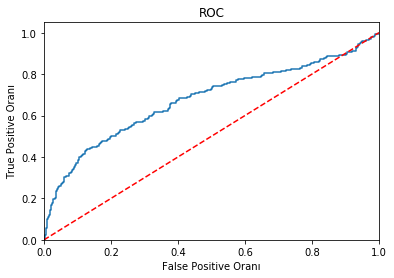

In [93]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)

In [95]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
accuracy_score(y_test, loj_model.predict(X_test))

0.9207920792079208

In [97]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.9187058823529413